<a href="https://colab.research.google.com/github/PanchoMal1977/curso-github-actions/blob/main/BD_S2T3V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>MAESTRIA EN IA APLICADA</h1>
<h1>BIG DATA</h1>

<h1>Tarea 3 Semana 2</h1>

<h1>Integrantes: Jhon Benalcazar</h1>

<h3>TEMA: Optimización de la Experiencia de Compra en Instacart: Un Análisis de Árboles de Decisiones, Random Forest y Gradient Boosting</h3>

<h1>Contexto</h1>

El propósito de este proyecto es prever qué productos comprarán los usuarios en el futuro, basándonos en las características del conjunto de datos creado durante la fase de limpieza de datos. Utilizando un conjunto de variables seleccionadas y procesadas cuidadosamente, buscamos anticipar las decisiones de compra de los usuarios. Al analizar estas características y su relación con el comportamiento de compra pasado, podemos desarrollar modelos predictivos que nos ayuden a comprender y pronosticar qué productos es más probable que los usuarios adquieran en el futuro. Este enfoque nos permite tomar decisiones informadas sobre la gestión de inventario, personalización de recomendaciones y estrategias de marketing, lo que mejora la experiencia del usuario y aumenta la eficiencia de los servicios que ofrece Instacart.

El conjunto de datos consta de los pedidos de 200,000 usuarios, con cada uno realizando entre 4 y 100 pedidos. Nuestro objetivo es predecir qué productos previamente comprados estarán en el próximo pedido de un usuario. Cada usuario ha comprado varios productos en pedidos anteriores, y tenemos información sobre el order_id de su próximo pedido. Este problema se trata de clasificación, ya que necesitamos prever si cada usuario comprará nuevamente ciertos productos o no, lo cual está indicado por la variable reordered, siendo reordered=1 o reordered=0.

Como resultado, hemos identificado varias variables predictoras que describen las características de un producto y el comportamiento del usuario con respecto a uno o varios productos. Estas nuevas variables se generaron al analizar los pedidos anteriores del conjunto de datos.

<h1>Asignación</h1>

Después de revisar el cuaderno sobre "Optimización de la Experiencia de Compra en Instacart mediante Análisis de Árboles de Decisión, Bosques Aleatorios y Impulso Gradiente", tu tarea consiste en implementar dos modelos basados en los métodos mencionados. Debes fusionar árboles de decisión, bosques aleatorios e impulso gradiente. Posteriormente, evalúa y compara ambos modelos para seleccionar el más eficaz. Finalmente, prueba el modelo seleccionado en el conjunto de datos de pruebas para determinar los productos que necesitan ser reordenados.


<h2>Código en Python</h2>

En esta sección, es fundamental cargar las diferentes bibliotecas que se utilizarán en el estudio para garantizar un análisis efectivo y eficiente de los datos. A continuación, se proporciona un ejemplo de cómo podrías cargar estas bibliotecas en Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, f1_score
from sklearn import tree
from sklearn import ensemble
from sklearn import model_selection

import itertools



Después, procedemos a cargar los datos utilizando la biblioteca Pandas. Puedes descargar los datos desde el aula virtual o el repositorio de <a href='https://drive.google.com/file/d/1ev8BAm9SEttmnwT-2gxik4_Y230UqWl1/view?usp=drive_link'>data</a>, dependiendo de tu preferencia.

In [2]:
df = pd.read_csv('/content/user_prod_train.csv')


**ANALISIS EXPLORATORIO DE DATOS**

Después de cargar los datos, es importante verificar su calidad y realizar cualquier limpieza necesaria para garantizar la precisión de nuestro análisis. Aquí tienes algunos pasos comunes que podríamos realizar para verificar y limpiar los datos:

Verificar la estructura de los datos: Revisar la forma del DataFrame, el tipo de datos de cada columna y la presencia de valores faltantes.

Manejo de valores faltantes: Decidir cómo manejar los valores faltantes, ya sea eliminándolos, imputándolos con algún valor, o utilizando técnicas más avanzadas como el imputado mediante modelos.

Corrección de tipos de datos: Convertir los tipos de datos según sea necesario para el análisis.



In [3]:
# ===========================================
# 1. Verificar la estructura de los datos
# ===========================================

print("\n" + "="*40)
print("🔎 FORMA DEL DATAFRAME (filas, columnas)")
print("="*40)
print(df.shape)

print("\n" + "="*40)
print("🔎 INFORMACION GENERAL DEL DATAFRAME")
print("="*40)
print(df.info())

print("\n" + "="*40)
print("🔎 PRIMERAS 5 FILAS DEL DATAFRAME")
print("="*40)
print(df.head())

print("\n" + "="*40)
print("🔎 RESUMEN ESTADISTICO DE LAS COLUMNAS NUMERICAS")
print("="*40)
print(df.describe())



🔎 FORMA DEL DATAFRAME (filas, columnas)
(8474661, 31)

🔎 INFORMACION GENERAL DEL DATAFRAME
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8474661 entries, 0 to 8474660
Data columns (total 31 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   user_id                           int64  
 2   product_id                        float64
 3   user_prod_total_bought            int64  
 4   one_shot_ratio_product            float64
 5   times_last5                       float64
 6   times_last5_ratio                 float64
 7   Times_Bought_N                    int64  
 8   total_orders                      int64  
 9   first_order_number                int64  
 10  Order_Range_D                     int64  
 11  Order_Ratio_user_id_X_product_id  float64
 12  item_first_ratio                  float64
 13  item_N2_ratio                     float64
 14  item_N3_ratio                     floa

In [4]:
# ===========================================
# 2. Manejo de valores faltantes
# ===========================================

print("\n" + "="*40)
print("❗ VALORES NULOS POR COLUMNA")
print("="*40)
print(df.isnull().sum())

# Ejemplo: Eliminar filas con valores nulos
df_sin_nulos = df.dropna()
print("\n" + "="*40)
print("🗑️ DATAFRAME SIN FILAS CON VALORES NULOS")
print("="*40)
print(df_sin_nulos.shape)




❗ VALORES NULOS POR COLUMNA
Unnamed: 0                          0
user_id                             0
product_id                          0
user_prod_total_bought              0
one_shot_ratio_product              0
times_last5                         0
times_last5_ratio                   0
Times_Bought_N                      0
total_orders                        0
first_order_number                  0
Order_Range_D                       0
Order_Ratio_user_id_X_product_id    0
item_first_ratio                    0
item_N2_ratio                       0
item_N3_ratio                       0
item_N4_ratio                       0
item_N5_ratio                       0
total_products_aisle_x              0
total_products_dept_x               0
total_products_aisle_ratio_x        0
total_products_dept_ratio_x         0
total_products_aisle_y              0
total_products_dept_y               0
total_products_aisle_ratio_y        0
total_products_dept_ratio_y         0
order_size_avg       

In [5]:
# ===========================================
# 3. Corrección de tipos de datos
# ===========================================

print("\n" + "="*40)
print("📌 TIPOS DE DATOS ANTES DE LA CONVERSION")
print("="*40)
print(df.dtypes)

# Ejemplo: Convertir columna a categórica
if 'columna_categorica' in df.columns:
    df['columna_categorica'] = df['columna_categorica'].astype('category')

# Ejemplo: Convertir columna a fecha
if 'columna_fecha' in df.columns:
    df['columna_fecha'] = pd.to_datetime(df['columna_fecha'], errors='coerce')

print("\n" + "="*40)
print("✅ TIPOS DE DATOS DESPUES DE LA CONVERSION")
print("="*40)
print(df.dtypes)



📌 TIPOS DE DATOS ANTES DE LA CONVERSION
Unnamed: 0                            int64
user_id                               int64
product_id                          float64
user_prod_total_bought                int64
one_shot_ratio_product              float64
times_last5                         float64
times_last5_ratio                   float64
Times_Bought_N                        int64
total_orders                          int64
first_order_number                    int64
Order_Range_D                         int64
Order_Ratio_user_id_X_product_id    float64
item_first_ratio                    float64
item_N2_ratio                       float64
item_N3_ratio                       float64
item_N4_ratio                       float64
item_N5_ratio                       float64
total_products_aisle_x                int64
total_products_dept_x                 int64
total_products_aisle_ratio_x        float64
total_products_dept_ratio_x         float64
total_products_aisle_y             

**ANALIS DEL EDA**

En el análisis exploratorio de datos se identificó que el conjunto cuenta con **8’474.661 filas y 31 columnas**, lo cual indica que se trata de un **dataset grande**, adecuado para entrenar modelos de machine learning, aunque también puede implicar un mayor costo computacional en las etapas de procesamiento y modelado, sobre todo si se usa recursos de hardware reducidos.

Durante la verificación de calidad de los datos:

* **No se encontraron valores nulos en las columnas**, lo que significa que **no es necesario aplicar técnicas de imputación ni eliminar registros**. Esto es positivo, ya que se preserva la totalidad de la información para el análisis.
* Los tipos de datos son enteros y flotantes, por lo cual no requiere una conversion, considerando que se va a tratar con variables categoricas
* La definicion y uso de un  **Random Seed** nos parecio interesante para controlar la generacion randomica, proporcionando un punto de partida unico para las divisiones de los datos y de esta manera garantizar reproducibilidad del modelo y su evaluacion.


Definir un Random Seed

In [13]:
#
RANDOMSEED=66


<h1>Divide tu data para entrenar el modelo y poder hacer pruebas de los modelos</h1>

In [14]:
#X_train, X_val, y_train, y_val = train_test_split(df.drop('reordered', axis=1), df.reordered, test_size=0.2, random_state=RANDOMSEED)
df.loc[:, 'reordered'] = df.reordered.fillna(0)

X_train, X_val, y_train, y_val = train_test_split(df.drop('reordered', axis=1), df.reordered, test_size=0.2, random_state=RANDOMSEED)


<h1>Funciones para evaluar los modelos y graficar</h1>

Revisa las funciones que utilizamos para evaluar los modelos.

In [15]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Comparar el rendimiento del modelo de aprendizaje automático con la referencia. Calculo estadísticos y Muestra de la curva ROC."""

    baseline = {}

    baseline['acurracy'] = accuracy_score(y_val, [1 for _ in range(len(y_val))])
    baseline['recall'] = recall_score(y_val, [1 for _ in range(len(y_val))])
    baseline['precision'] = precision_score(y_val, [1 for _ in range(len(y_val))])
    baseline['f1_score'] = f1_score(y_val, [1 for _ in range(len(y_val))])
    baseline['roc'] = 0.5

    results = {}
    results['acurracy'] = accuracy_score(y_val, predictions)
    results['recall'] = recall_score(y_val, predictions)
    results['precision'] = precision_score(y_val, predictions)
    results['f1_score'] = f1_score(y_val, predictions)
    results['roc'] = roc_auc_score(y_val, probs)

    train_results = {}
    train_results['acurracy'] = accuracy_score(y_train, train_predictions)
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['f1_score'] = f1_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)

    for metric in ['acurracy', 'recall', 'precision', 'f1_score', 'roc']:
        display(f'Base de comparación {metric.capitalize()}: {round(baseline[metric], 2)} Prueba: {round(results[metric], 2)} Entrenamiento: {round(train_results[metric], 2)}')

    #Calcular tasas de falsos positivos y tasas de verdaderos positivos.
    base_fpr, base_tpr, _ = roc_curve(y_val, [1 for _ in range(len(y_val))])
    model_fpr, model_tpr, _ = roc_curve(y_val, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16

    plt.plot(base_fpr, base_tpr, 'b', label = 'Base de comparación')
    plt.plot(model_fpr, model_tpr, 'r', label = 'Modelo')
    plt.legend()
    plt.xlabel('Tasa de Falsos Positivos'); plt.ylabel('Tasa de Verdaderos Positivos'); plt.title('Curva ROC')

def plot_confusion_matrix(predictions):

    cm = confusion_matrix(y_val, predictions)
    classes = ['Sin reorden', 'Con reorden']

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Matriz de confusión', size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta predicha')

def plot_features(model):
    feat = list(X_train.columns)
    fi = pd.DataFrame({'feature': feat,
                    'importance': model.feature_importances_}).\
                        sort_values('importance', ascending = False)

    x_values = list(range(len(fi['importance'])))
    plt.bar(x_values, fi['importance'], orientation = 'vertical')
    plt.xticks(x_values, fi['feature'], rotation='vertical')
    plt.ylabel('importance')
    plt.xlabel('Características')
    plt.title('Importancias de las características')

def plot_tree(model):
    tree.plot_tree(model,
                   feature_names=X_train.columns,
                   filled=True)
    plt.show()

<h1>Entrenamiento de los modelos</h1>

Vamos a definir el primer modelo a entrenar. Dado el tamaño de los datos, es recomendable limitar la complejidad del modelo para evitar tiempos de entrenamiento prolongados.

Creamos un modelo de arbol de decisión para clasificación. Este tipo de modelo toma decisiones binarias en cada nodo del árbol para predecir la clase de cada registro.

Limitamos el numero maximo de nodos donde se hace predicciones a 500, si bien es cierto este modelo va a generar mas carga de recursos de hardware su nivel de precision puede ser mayor, dependiendo del giro del negocio. Al limitar el arbol, evitamos que haya un sobre ajuste en las predicciones.

La definicion del RANDOMSEED garantiza que si ejecutamos el mismo codigo, con los mismos datos, vamos a obtener el mismo arbol.

Se entrena el modelo con el subconjunto de datos de entrenamiento **X_train** y la etiquetas reales **y_train**.

El mismo escenario se aplica para un modelo diferente.


In [16]:
#
model_medium_tree = tree.DecisionTreeClassifier(max_leaf_nodes=500, random_state=RANDOMSEED)
model_medium_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=500, random_state=66)

Vamos a determinar los nodos y la profundidad del modelo. Es importante ajustar estos parámetros para equilibrar la capacidad de aprendizaje del modelo y evitar el sobreajuste.

In [17]:
#
display(f'El árbol de decisión tiene un score de {model_medium_tree.score(X_val, y_val)}, {model_medium_tree.tree_.node_count} nodos con profundidad máxima {model_medium_tree.tree_.max_depth}.')

'El árbol de decisión tiene un score de 0.9093852087368646, 999 nodos con profundidad máxima 14.'

# **RESULTADOS DEL ENTRENAMIENTO**

El modelo de arbol de decision obtiene un **score = 0.9094**. Esto indica que el modelo tiene una exactitud del 90.94% en los datos con los que se evaluo. Lo que significa que aproximadamente 9 de cada 10 predicciones son correctas.

Es un buen desempeño, pero conviene compararlo con el score en el conjunto de prueba para asegurarnos de que no hay sobreajuste.

El arbol escalo a **999 nodos**, donde cada nodo representa un punto de decisión dentro del árbol. 999 nodos indican que el árbol tiene muchas reglas internas, lo que le permite capturar patrones complejos en los datos. Sin embargo, un árbol muy grande puede ser difícil de interpretar y más propenso a sobreajustarse.

El arbol tiene una **profundidad máxima = 14**, siendo esta la longitud máxima desde la raíz hasta una hoja. Una profundidad de 14 significa que algunas predicciones requieren hasta 14 decisiones consecutivas para llegar a la hoja final. Profundidades grandes pueden mejorar la exactitud, pero también aumentan la complejidad del árbol y el riesgo de overfitting.

Vamos a realizar las predicciones de probabilidad y las predicciones para los datos de entrenamiento y de prueba con el primer modelo. Esto nos permitirá evaluar el desempeño del modelo en ambos conjuntos de datos y comprender su capacidad para generalizar a datos no vistos.

In [18]:
#train_probs = model.predict_proba(X_train)[:, 1]
#probs = model.predict_proba(X_val)[:, 1]

#train_predictions = model.predict(X_train)
#predictions = model.predict(X_val)

# Realizar predicciones de probabilidad para el arbol mediano
train_probs_medium_tree = model_medium_tree.predict_proba(X_train)[:, 1]
probs_medium_tree = model_medium_tree.predict_proba(X_val)[:, 1]
train_predictions_medium_tree = model_medium_tree.predict(X_train)
predictions_medium_tree = model_medium_tree.predict(X_val)

Nos gustaría presentar la evaluación del modelo

¿Podrías explicar lo que entiendes del resultado?

'Base de comparación Acurracy: 0.1 Prueba: 0.91 Entrenamiento: 0.91'

'Base de comparación Recall: 1.0 Prueba: 0.17 Entrenamiento: 0.18'

'Base de comparación Precision: 0.1 Prueba: 0.63 Entrenamiento: 0.63'

'Base de comparación F1_score: 0.18 Prueba: 0.27 Entrenamiento: 0.27'

'Base de comparación Roc: 0.5 Prueba: 0.82 Entrenamiento: 0.82'

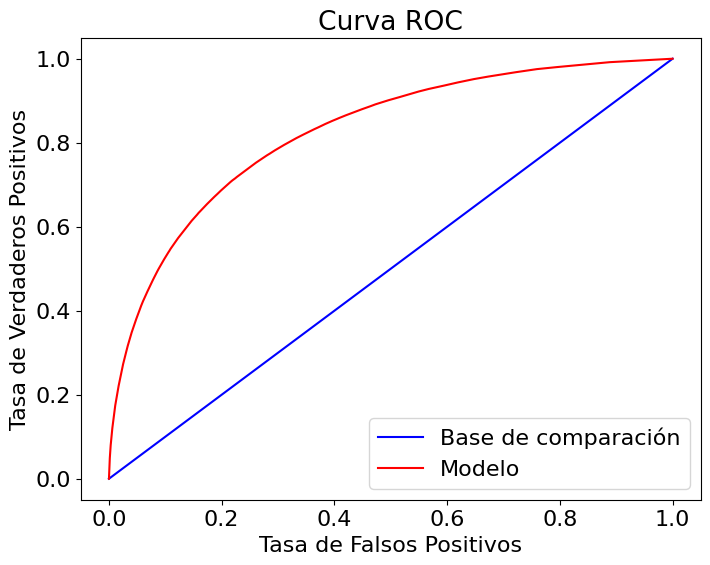

In [19]:
#evaluate_model()
#plot_confusion_matrix()
#plot_features()
#plot_tree()

evaluate_model(predictions_medium_tree, probs_medium_tree, train_predictions_medium_tree, train_probs_medium_tree)



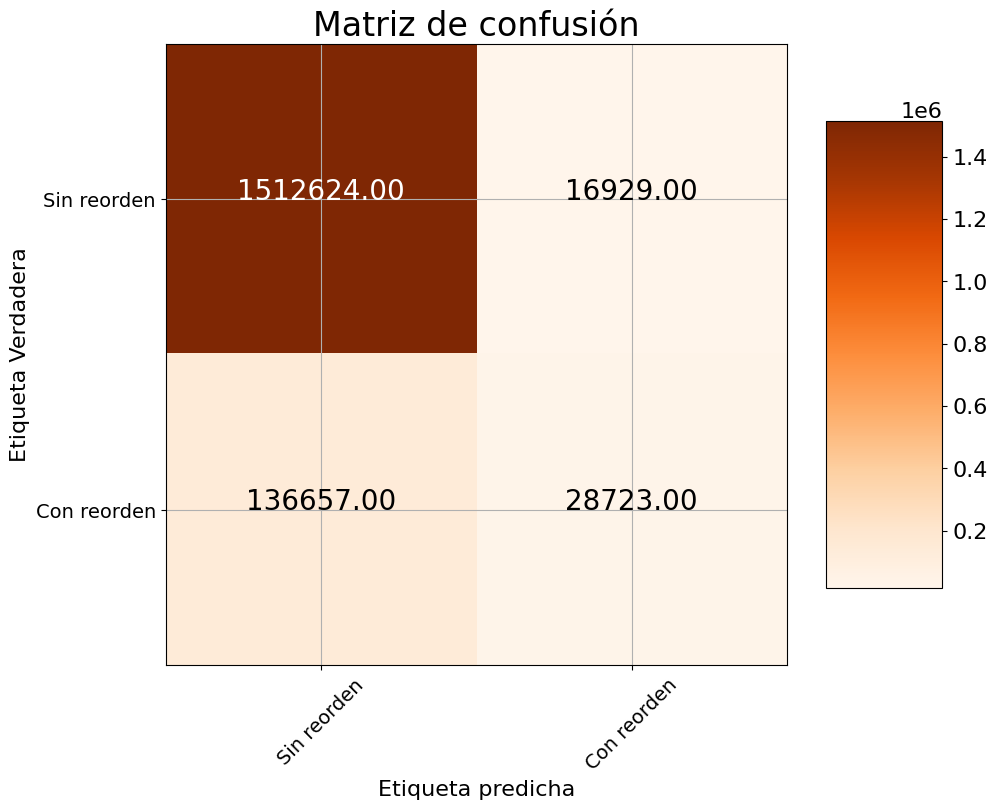

In [ ]:
plot_confusion_matrix(predictions_medium_tree)


In [ ]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_val, predictions_medium_tree)

# Imprimir la matriz en texto
print("Matriz de Confusión (valores absolutos):")
print(cm)

# Opcional: mostrar con etiquetas más claras
classes = ['Sin reorden', 'Con reorden']
print("\nMatriz de Confusión con etiquetas:")
for i, row in enumerate(cm):
    print(f"{classes[i]}: {row}")

Matriz de Confusión (valores absolutos):
[[1512624   16929]
 [ 136657   28723]]

Matriz de Confusión con etiquetas:
Sin reorden: [1512624   16929]
Con reorden: [136657  28723]


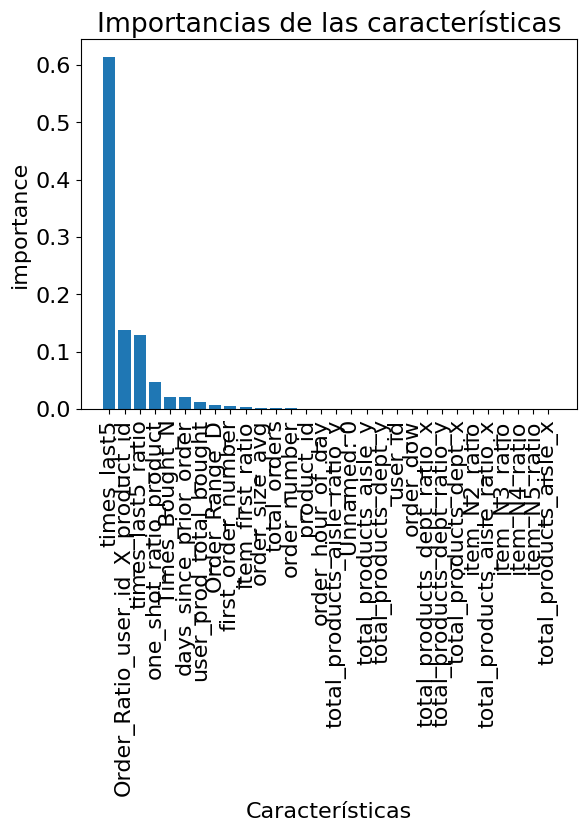

In [ ]:
plot_features(model_medium_tree)


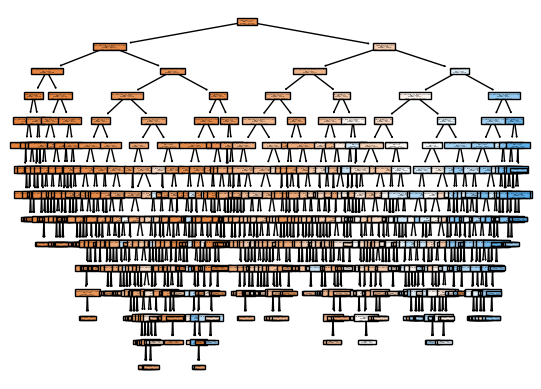

In [ ]:
plot_tree(model_medium_tree)

# EXPLICACION DEL RESULTADO

COn base a la matriz de confusion, la clase **“Sin reorden”** está muy bien predicha, mientras que la clase **“Con reorden”** tiene muchos falsos negativos.

Esto coincide con las métricas de evaluacion del modelo, Accuracy alta (0.91) porque **la mayoría de los datos son “Sin reorden”**, la precisión global parece buena. Sin embargo con un Recall bajo (0.17), pocos positivos reales son detectados y una precision (0.63) cuando predice positivo, suele acertar.

Vamos a definir el segundo modelo a entrenar. Dado el tamaño de los datos, es recomendable limitar la complejidad del modelo para evitar tiempos de entrenamiento prolongados.

In [ ]:
#
model_random_forest = ensemble.RandomForestClassifier(random_state=RANDOMSEED,
                                                      n_estimators=100,
                                                      max_features = 'sqrt',
                                                      n_jobs=-1,
                                                      verbose = 1)
model_random_forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


# COMENTARIOS SOBRE EL SEGUNDO MODELO

Creamos un modelo de bosque aleatorio para clasificación. El cual combina muchos árboles de decisión para mejorar la precisión y reducir el sobreajuste. Usamos el mismo RANDOMSEED pre establecido, para garantizar que los resultados sean reproducibles cada vez que se ejecute el código.

Definimos 100 árboles dentro del bosque. Más árboles deberian mejorar la estabilidad y precisión, pero aumentan el tiempo de entrenamiento.


Vamos a determinar los nodos y la profundidad del modelo. Es importante ajustar estos parámetros para equilibrar la capacidad de aprendizaje del modelo y evitar el sobreajuste.

In [ ]:
#


n_nodes = []
max_depths = []

for ind_tree in model_random_forest.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

display(f'El Modelo de Random Forest tiene un promedio de {int(np.mean(n_nodes))} nodos con profundidad promedio de {int(np.mean(max_depths))}')



Vamos a realizar las predicciones de probabilidad y las predicciones para los datos de entrenamiento y de prueba con el segundo modelo. Esto nos permitirá evaluar el desempeño del modelo en ambos conjuntos de datos y comprender su capacidad para generalizar a datos no vistos.

In [ ]:
#


train_probs_random_forest = model_random_forest.predict_proba(X_train)[:, 1]
probs_random_forest = model_random_forest.predict_proba(X_val)[:, 1]
train_predictions_random_forest = model_random_forest.predict(X_train)
predictions_random_forest = model_random_forest.predict(X_val)





Nos gustaría presentar la evaluación del modelo

¿Podrías explicar lo que entiendes del resulato?

In [ ]:
#
evaluate_model(predictions_random_forest, probs_random_forest, train_predictions_random_forest, train_probs_random_forest)

Vamos a comparar los resultados de ambos modelos y luego explicaremos por qué optamos por utilizar uno sobre el otro.

In [ ]:
#
# Diccionario para guardar métricas de cada modelo
resultados = {}

def registrar_resultados(nombre_modelo, predictions, probs, train_predictions, train_probs):
    resultados[nombre_modelo] = {
        'Accuracy (val)': accuracy_score(y_val, predictions),
        'Recall (val)': recall_score(y_val, predictions),
        'Precision (val)': precision_score(y_val, predictions),
        'F1-score (val)': f1_score(y_val, predictions),
        'ROC-AUC (val)': roc_auc_score(y_val, probs),
        'Accuracy (train)': accuracy_score(y_train, train_predictions),
        'ROC-AUC (train)': roc_auc_score(y_train, train_probs)
    }

# Guardamos resultados de los modelos ya entrenados
registrar_resultados("DecisionTree Mediano", predictions_medium_tree, probs_medium_tree, train_predictions_medium_tree, train_probs_medium_tree)
registrar_resultados("Random Forest", predictions_random_forest, probs_random_forest, train_predictions_random_forest, train_probs_random_forest)

# Si ya entrenaste Random Forest y Gradient Boosting, los agregas aquí igual:
# registrar_resultados("Random Forest", predictions_rf, probs_rf, train_predictions_rf, train_probs_rf)
# registrar_resultados("Gradient Boosting", predictions_gb, probs_gb, train_predictions_gb, train_probs_gb)

# Convertimos a DataFrame para comparar mejor
df_resultados = pd.DataFrame(resultados).T.sort_values(by="ROC-AUC (val)", ascending=False)
display(df_resultados)


<h1>Prueba del modelo con nuevo datos</h1>

Carga el nuevo conjunto de datos de pruebas, lo puedes descargar desde <a href='https://drive.google.com/file/d/1GfmCmZMKoosYaO_5vZW9NxlrHc1p32wc/view?usp=drive_link'>aqui</a>

In [ ]:
#
# Cargar dataset de pruebas
df_test = pd.read_csv('/content/user_prod_test.csv')

# Verificar la estructura
print(df_test.shape)
df_test.head()


Vamos a realizar las predicciones de probabilidad y las predicciones para los datos nuevos con el modelo seleccionado. Esto nos permitirá ver el comportamiento del modelo con datos nuevo.

In [ ]:
#
X_test = df_test

test_probs = model_medium_tree.predict_proba(X_test)[:, 1]
test_predictions = model_medium_tree.predict(X_test)


Nos gustaría presentar la evaluación del modelo

¿Podrías explicar lo que entiendes del resulato?

In [ ]:
#
df_test['reorder_pred'] = test_predictions
df_test['reorder_prob'] = test_probs

# Mostrar primeros resultados
df_test.head()



<h1>Discusión y Conclusión</h1>

Presenta tus conclusiones sobre el trabajo llevado a cabo

<h1>Referencia</h1>
